In [1]:
from scipy import sparse
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#대각선 원소는 1, 나머지 0인 2차원 NumPy
eye=np.eye(4)
print("NumPy 배열:\n", eye)

NumPy 배열:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
# NumPy 배열을 CSR 포맷의  SciPy 희박 행렬로
# 0이 아닌 원소만 저장
sparse_matrix=sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
#COO 포맷을 이용
data=np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo=sparse.coo_matrix((data,(row_indices, col_indices)))
eye_coo


<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in COOrdinate format>

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt


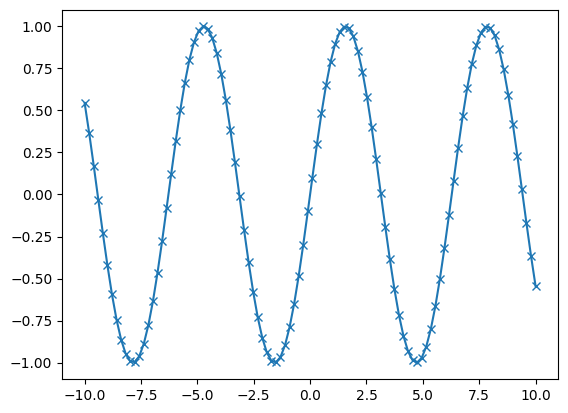

In [7]:
#-10에서 10까지 100개 간격으로 나뉘어진 배열 생성
x=np.linspace(-10,10,100)
#사인 함수 사용해서 .y배열 생성
y=np.sin(x)
#plot 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프를 그림
plt.plot(x,y, marker="x")

In [8]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.9 MB/s eta 0:00:00


In [9]:
## Pandas
import mglearn

X.shape (26, 2)


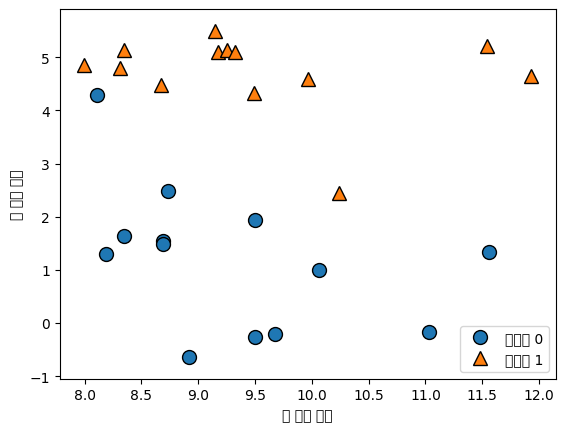

In [10]:
# forge: 이진 데이터 분류셋
X,y=mglearn.datasets.make_forge()
#산점도
mglearn.discrete_scatter(X[:, 0], X[:,1],y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape", X.shape)

Text(0, 0.5, '타깃')

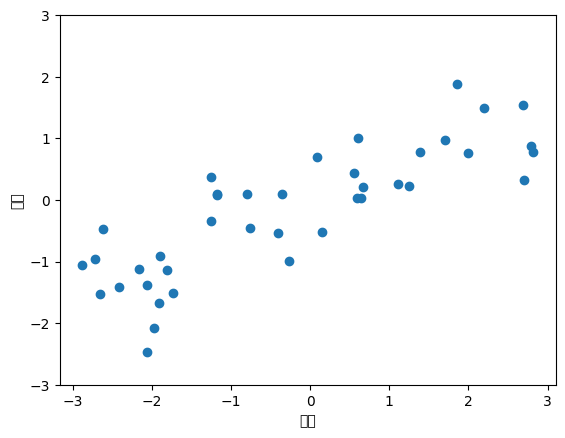

In [11]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [12]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [14]:
print("클래스별 샘플 개수: \n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
#569개 중 212 악성, 357 양성

클래스별 샘플 개수: 
 {'malignant': 212, 'benign': 357}


In [15]:
print("특성 이름: \n", cancer.feature_names)

특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
X,y=mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


##k-최근접 이웃

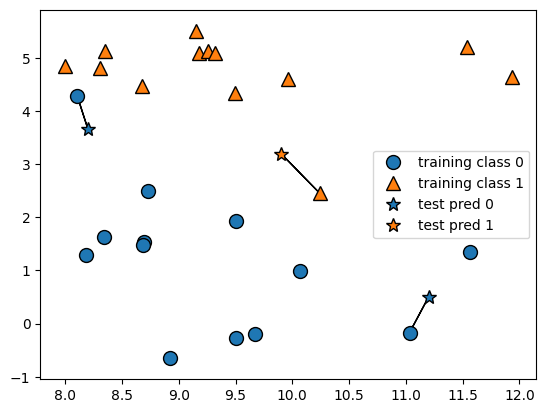

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

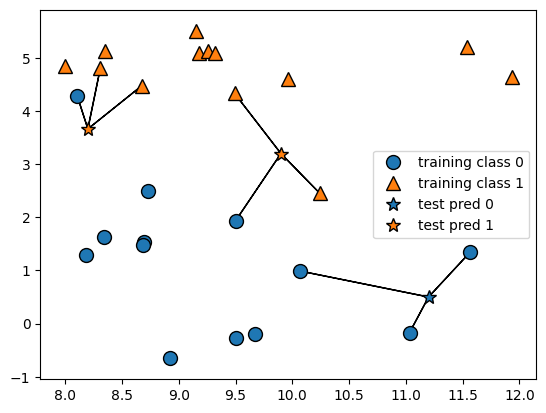

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [20]:
from  sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)


In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [23]:
#테스트 세트 정확도:86% 정확히 예측함
print("{:.2f}".format(clf.score(X_test,y_test)))

0.86


KNeighborsClassifier **분석** **굵은 텍스트**
-2차원 데이터셋으로 모든 테스트 포인트의 예측을 xy 평면에 그리기 가능
-결정경계: 클래스 0,1로 지정한 영역으로 나뉜다.

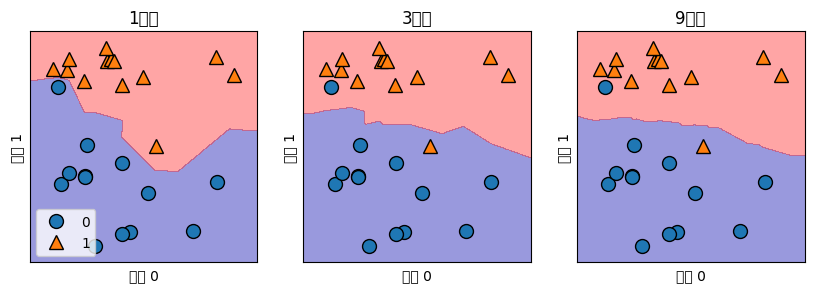

In [24]:
import matplotlib.pyplot as plt

# 이웃 1,3,9 일때의 경계

#하나의 행과 세 개의 열로 구성된 서브플롯을 생성
fig, axes= plt.subplots(1,3, figsize=(10,3))


# 1, 3, 9 세 가지 이웃의 값을 순서대로 n_neighbors 변수에 저장
for n_neighbors, ax in zip([1,3,9], axes):
  # fit 메소는 self 오브젝트를 리턴
  # 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
  clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  #결정 경계를 서브플롯 ax에 그림
  #fill=True 매개변수는 결정 영역을 색칠하며, eps는 그리는 간격을 조절하고, alpha는 결정 경계의 투명도를 설정
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  # 훈련 데이터 포인트를 서브플롯 ax에 표시
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
#첫 번째 서브플롯에 범례를 추가합니다. loc=3은 범례 위치
axes[0].legend(loc=3)

<function matplotlib.pyplot.legend(*args, **kwargs)>

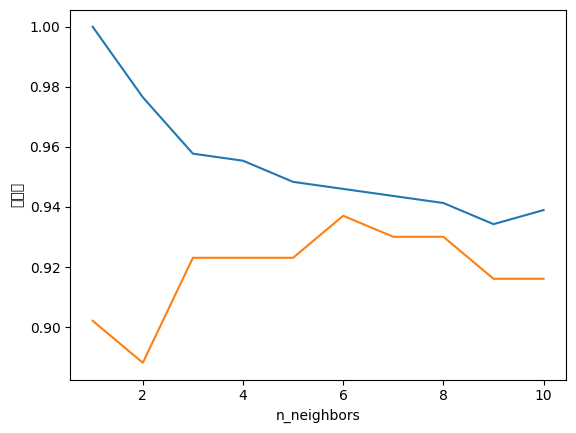

In [25]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy =[]

#1~10까지 n_neighbors 적용
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
  #모델 생성
  clf=KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  #훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  #일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend

# 정확도가 가장 좋을 때는 6개 사용했을 경우

k-최근접 이웃 회귀

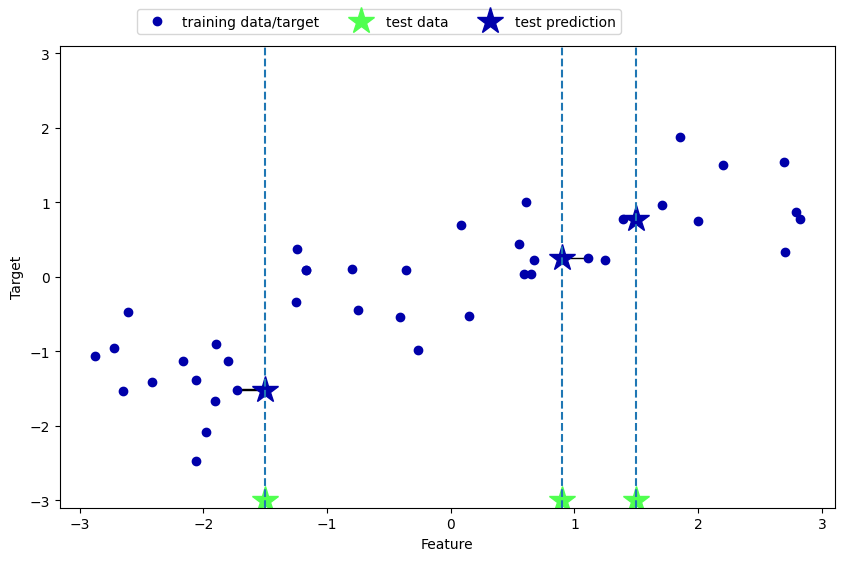

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

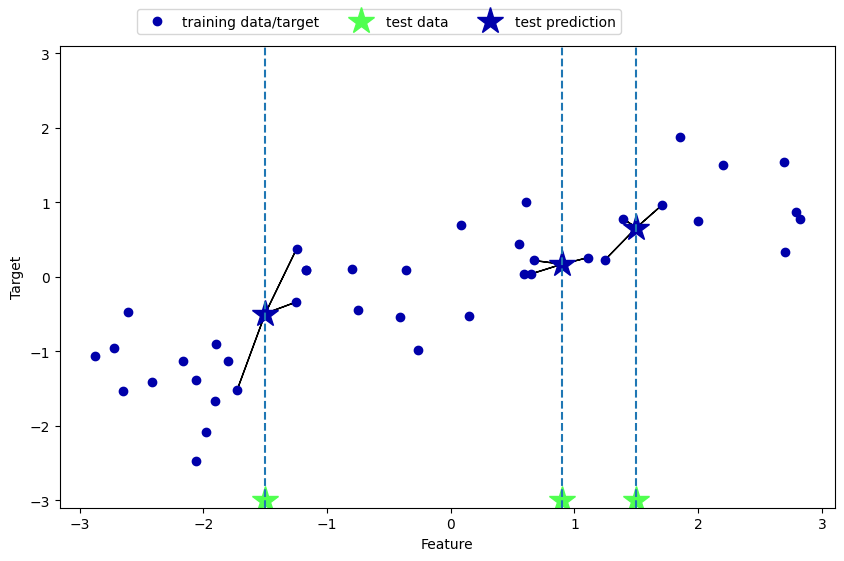

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X,y= mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=0)

#이웃의 수를 3으로 하여 모델 객체 생성
reg=KNeighborsRegressor(n_neighbors=3)

#훈련 데이터와 타깃을 사용하여 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [29]:
 print(reg.predict(X_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [30]:
print("{:.2f}".format(reg.score(X_test, y_test)))

0.83



## R^2은 회귀일 때 반환하는것
## R^2은 회귀 모델에서 예측의 적합도를 측정한 것
## 0-1 사이 값
## 1: 완벽하게 예측한 값, 0:y_train의 평균으로만 예측하는 모델의 경우



## KNeighborsRegressor

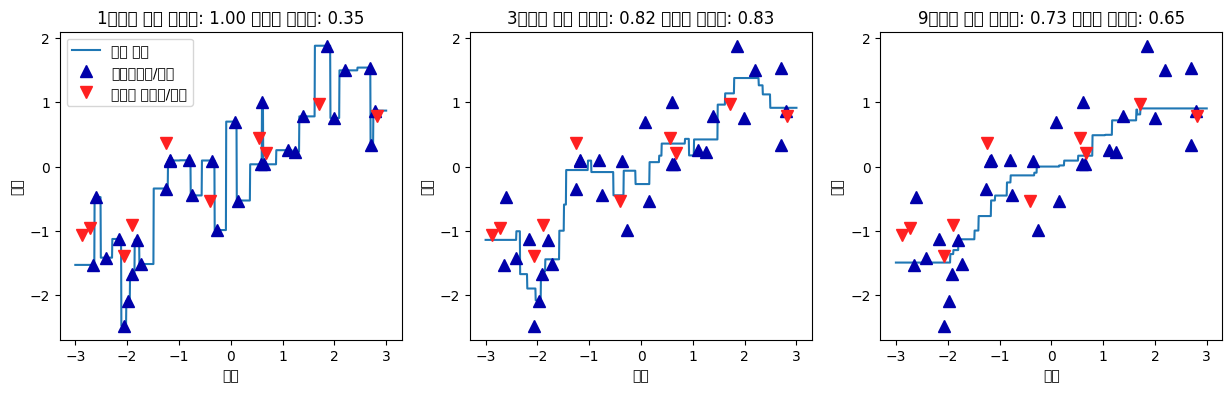

In [31]:


fig, axes=plt.subplots(1,3,figsize=(15,4))

#-3과 3tkdldp 1000개의 데이터 포인트
line=np.linspace(-3 ,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
  #1,3,9 이웃을 사용한 예측
  reg=KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)


  ax.set_title(
      "{}이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
          n_neighbors, reg.score(X_train, y_train),
          reg.score(X_test, y_test)
      )
  )
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")

axes[0].legend(["모델 예측 ", "훈련데이터/타깃", "테스트 데이터/타깃"], loc="best")

# 이웃 많이 사용시 훈련 데이터 정확도는 떨어지지만 안정된 예측 얻어내기 가능

##About KNeighbors


*   해당 분류기의 중요 매개 변수는 2가지-데이터 포이늩 사이의 거리 재는 방법, 이웃의 수

*   이웃의 수는 3,5개 와 같은 적은 수 적정


*   매개변수 잘 조정 필요 _유클리디안 거리 조정법


##k-NN

*   이해하기 쉬운 모델
*   많은 조정 없어도 좋은 성능 발휘
*   훈련 세트 크면 예츨 속도 저하
*   전처리 중요









## 선형 모델

w[0]: 0.393906  b: -0.031804


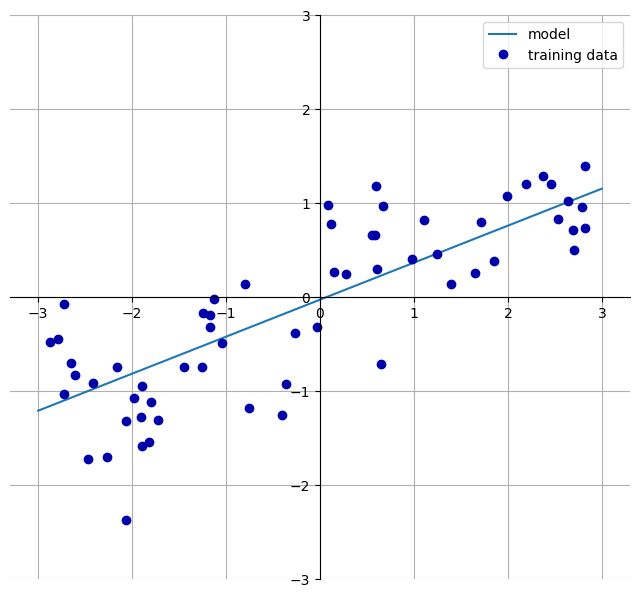

In [32]:
mglearn.plots.plot_linear_regression_wave()

In [33]:
## 위의 그래프는 w[0]값을 보면 기울기 대략 0.4

# 선형 회귀(최소 제곱법)



*   예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w, b 찾기

*



In [34]:
# 선형 모델
from sklearn.linear_model import LinearRegression

X,y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

lr=LinearRegression().fit(X_train,y_train)

In [35]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [36]:
#lr.coef: 가중치, 계수 저장 (w_기울기 파라미터)
#lr.intercept: 편향, 절편(b_절편 파라미터)

In [37]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
##66% R^2 값은 좋은 값이 아님
##하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷=과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [38]:
X,y= mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [39]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
## 훈련과 테스트 사이의 성능 차이는 과대적합 된것
##해결 방법: 리지회귀

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


## 리지 회귀


---



*   가중치  w 선택은 훈련 데이터를 잘 예측하기 위함+추가 제약 조건 만족
*   가충치의 절댓값을 가능한  작게=모든 w의 원소가 0에 가깝게
*   규제: 모든 특성이 출력에 주는 영향을 최소한으로=L2 규제






In [40]:
from sklearn.linear_model import Ridge

ridge= Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

# 선형회귀는 과대접합, ridge는 과대적합 적어짐

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [41]:
## alpha 값을 높이면 계수를 0에 가깝게 만들어서 훈련세트의 성능은 나빠지지만 일반화에는 도움
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [42]:
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련세트점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트세트점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# 테스트 세트에 대한 성능 높아질 때까지 alpha 값 줄일 수 있을 것

훈련세트점수: 0.93
테스트세트점수: 0.77


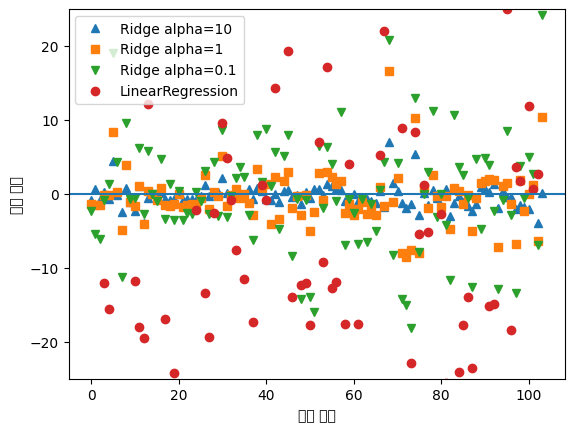

In [43]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

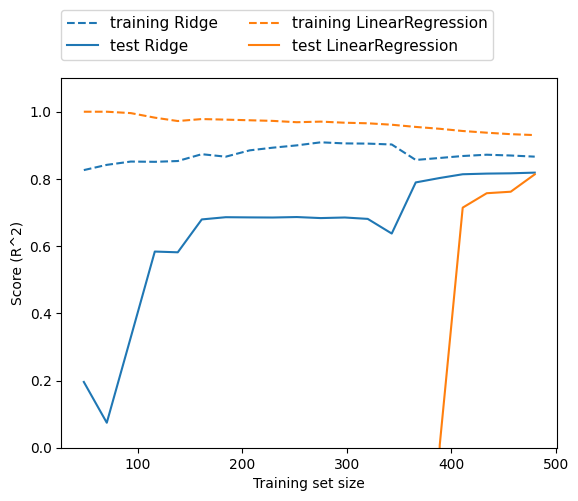

In [44]:
mglearn.plots.plot_ridge_n_samples()

## 라쏘


*   Ridge 대안
*   L1 규제






In [45]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [46]:
#max_iter 기본값 증가 시키지 않으면 max_iter 값을 늘리라는 경고 발생
#max_iter: 반복 실행하는 최대 횟수
lasso001=Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수:0.90
테스트 세트 점수: 0.765657
사용한 특성의 개수: 33


In [47]:
# alpha 값을 낮추면 모델의 복잡도 증가하여 훈련 세트, 테스트 세트 성능 좋아짐
# alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합 되어 LinearRegression 결과와 비슷

lasso00001=Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso00001.coef_!=0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수:  96


Text(0, 0.5, '계수 크기')

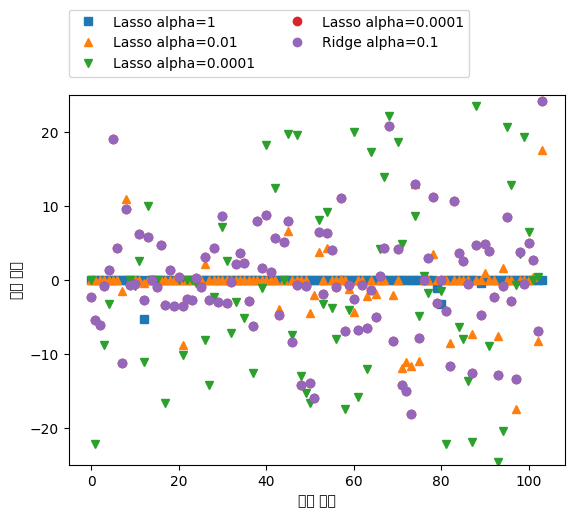

In [48]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

## ElasticNet
: L!+L2 규제 위한 매개변수 두 개 조정 필요

## 분류용 선형 모델


*   로지스틱 회귀
*   서포트 백터 머신



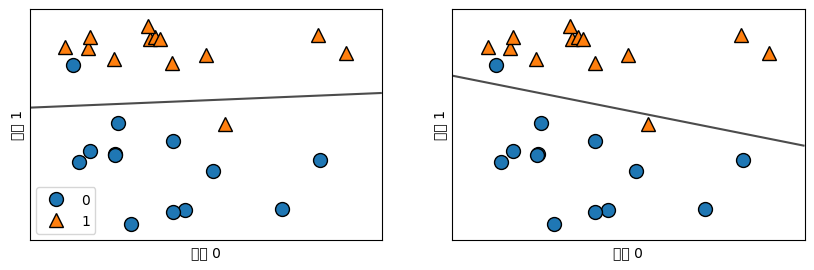

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()

fig, axes=plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf=model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1],y,ax=ax)
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend()

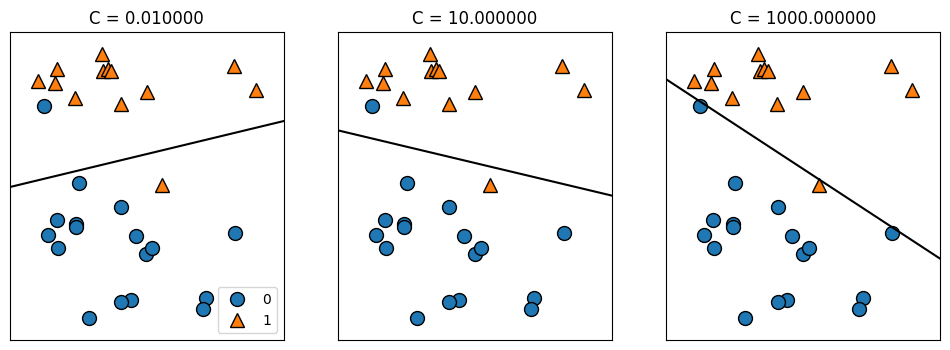

In [50]:
mglearn.plots.plot_linear_svc_regularization()

In [51]:
# 유방암 데이터셋을 사용해서 LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))


훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [52]:
# 모델 제약 더 풀기 위해서 C 증가 시킴_복잡도가 높은 모델일수록 성능이 좋음
logreg100=LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.981
테스트 세트 점수: 0.965


In [53]:
# 모델 제약 규제 더 강하게 하기 위해 C 감소 시킴_훈련, 테스트 세트 정확도 낮아짐
logreg001=LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


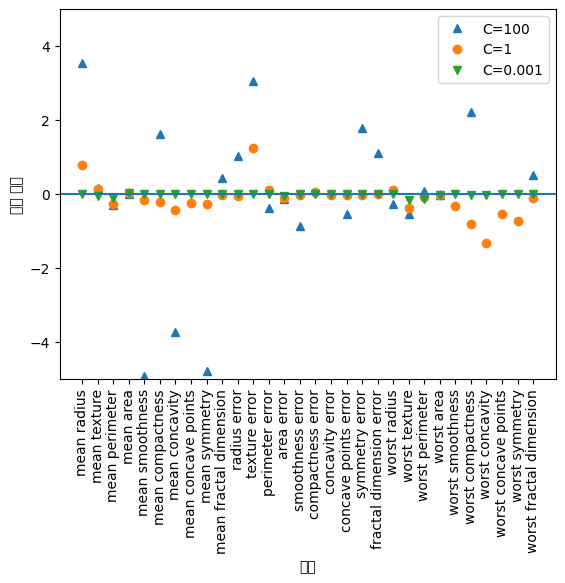

In [54]:
#위의 규제의 변화를 그래프로
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001인 l1로지스틱 회귀의 훈련 정확도:0.91
C=0.001인 l1로지스틱 회귀의 테스트 정확도:0.92
C=1.000인 l1로지스틱 회귀의 훈련 정확도:0.96
C=1.000인 l1로지스틱 회귀의 테스트 정확도:0.96
C=100.000인 l1로지스틱 회귀의 훈련 정확도:0.99
C=100.000인 l1로지스틱 회귀의 테스트 정확도:0.98


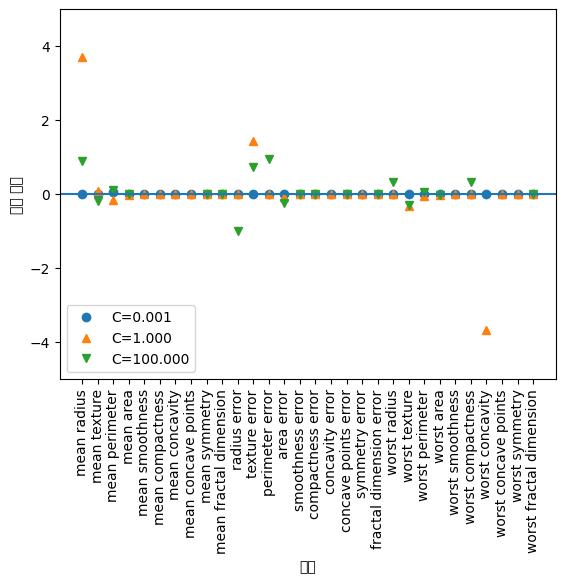

In [55]:
#L1 규제 사용할 때의 분류 정확도와 계수 그래프
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1=LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
  print("C={:.3f}인 l1로지스틱 회귀의 훈련 정확도:{:.2f}".format(C, lr_l1.score(X_train, y_train)))
  print("C={:.3f}인 l1로지스틱 회귀의 테스트 정확도:{:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

## 다중 클래스 분류용 선형 모델

1.   선형분류는 많이들 이진 분류만을 지원
2.   다중 클래스 지원 하지 않음
3.   이진 분류 알고리즘을 다중 클래스 분류 알고리즘을 확장하는 보편적인 기법은 일대다 방법
4.   일대 다 방법은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습 시킴



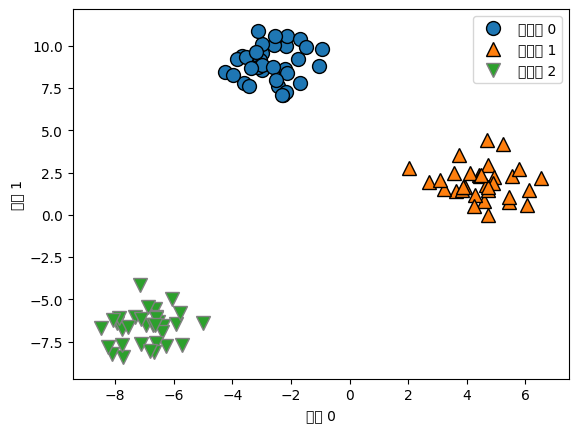

In [56]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "틀래스 1", "클래스 2"])

In [57]:
##위의 데이터셋으로 LinearSVC 분류기 훈련
linear_svm=LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


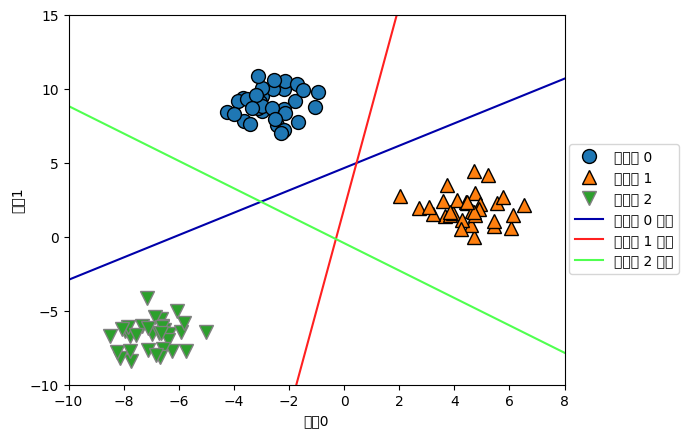

In [58]:
#세 개의 이진 분류기가 만드는 경계를 시각화
#그림 중앙의 삼각형 영역은 분류 공식의 결과가 가장 높은 클래스 입니다. 즉 가장 가까운 직선의 클래스
mglearn.discrete_scatter(X[:, 0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계','클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

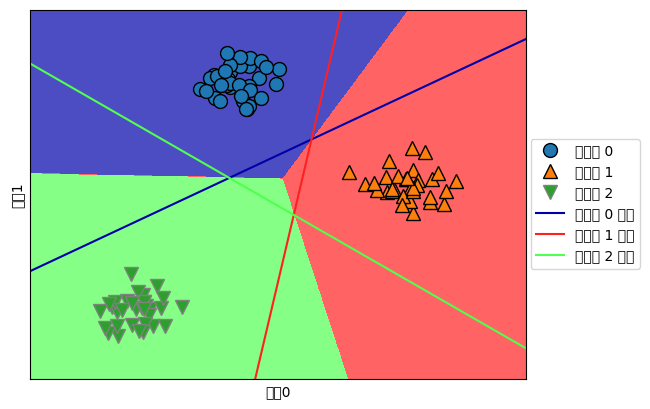

In [59]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0]+intercept)/coef[1], c=color)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계','클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

# alpha: 선형모델의 주요 매개 변수_회귀모델
# C: LinearSVC, LogisticRegresion 에서의 주요 매개 변수
# L1규제: 중요한 특성이 많지 않다.
# L2규제: 기본적으로 사용하는 규제


**메서드 연결
**

In [60]:
#한줄에서 모델의 객체를 생성과 학습을 한번에 실행
logreg= LogisticRegression().fit(X_train, y_train)

logreg=LogisticRegression()
y_pred=logreg.fit(X_train,y_train).predict(X_test)

In [61]:
y_pred=LogisticRegression().fit(X_train, y_train).predict(X_test)